Pesquisa de estatistica


importado dados dos csvs

In [145]:

!pip install nbformat 
import plotly.express as px
import matplotlib.pyplot as plt


Defaulting to user installation because normal site-packages is not writeable


In [146]:

#pip install pandas
#pip install numpy

import pandas as pd
import numpy as np
import math
import seaborn as sns

data=pd.read_csv('Serviços de assinaturas de jogos - Pesquisa .csv')
gringoData=pd.read_csv('INGLES Serviços de assinaturas de jogos.csv')
original=len(data)


Olhando os dados obtidos da pesquisa

In [147]:
data.head(1)

,Carimbo de data/hora,Qual é sua idade?,Qual é seu gênero?,Qual é sua ocupação?,Qual é seu estado civil?,Qual é seu nível de inglês?,Têm filhos?,Você joga vídeogames?,Quanto(s) jogos você comprou nos últimos 3 meses?,Qual(is) seu(s) gêneros de jogo favorito?,Prefere jogos em qual mídia?,Qual(is) desse(s) critério(s) você considera importante ao comprar um jogo?,Assina algum serviço de assinatura de jogos?,Qual(is)?,Quanto pagaria em um serviço de assinatura de jogos por mês em (R$)?
0,2022/05/12 4:26:30 PM GMT-3,20,Feminino,Estudante,Solteira(o),Fluente,Não,Sim,0.0,Ação/Aventura,Mídia digital,Indiferente,Não,NaN,Não pagaria


In [148]:
gringoData.head(1)

,Carimbo de data/hora,How old are you?,What's your gender?,What's your occupation?,What's your marital status?,What's your level of English?,Do you have kids?,Do you play videogames?,How many games did you bought in the last 3 mounts?,Which are your favorite game genre?,Which type of media do you prefer?,Which criteria do you consider before buying a game?,Do you pay for any game membership?,Which of the following?,How much would you pay for a monthly game membership USD($)?
0,2022/05/15 4:06:23 PM GMT-3,19,Masculine,Student,Single,Fluent,No,Yes,4,Action/Adventure;Race;FPS;Fighting game;RPG,Digital media,Sale;Price;Quality,No,NaN,Wouldn't pay


Renomeando os titulos

In [149]:
if(data.columns[0]=='Carimbo de data/hora'):
    data.drop("Carimbo de data/hora", axis=1, inplace=True)
    gringoData.drop("Carimbo de data/hora", axis=1, inplace=True)
    print("removido")

removido


In [150]:
titulos=['idade', 
        'genero',
       'ocupacao',
        'estado',# estado civil
       'ingles', # nivel de ingles
       'filhos', # tem filhos
       'joga',   #joga videogames?
       'quant_jogos',#quantos jogos voce comprou?
       'fav_jogos',#titulo favorito                                              (falta traduzir os titulos)
       'midia',     #prefere qual midia de jogos (fisica/digita)
       'importante_jogo',
       'assina', 
       'quais',#o que assina 
       'paga' # quanto ira pagar
       ]



O tempo e hora da resposta é irrelevante para a pequisa entao iremos removelos

Como temos dados em duas linguas iremos traduzir as perguntas e dados para o PORTUGUES

In [151]:
data.columns=titulos
gringoData.columns=titulos
print(data.columns==gringoData.columns)
data.head(1)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


,idade,genero,ocupacao,estado,ingles,filhos,joga,quant_jogos,fav_jogos,midia,importante_jogo,assina,quais,paga
0,20,Feminino,Estudante,Solteira(o),Fluente,Não,Sim,0.0,Ação/Aventura,Mídia digital,Indiferente,Não,NaN,Não pagaria


In [152]:
i=1
while i<8:
    
    print(data[titulos[i]].unique())
    i=i+1

i=9
while i<len(gringoData.columns):
    
    print(data[titulos[i]].unique())
    i=i+1

print("\n")


    


['Feminino' 'Masculino' 'Outros' 'Prefiro não informar']
['Estudante' 'Desempregado' 'Estudante;Desempregado'
 'Estudante;Trabalhador' 'Estudante;ASTROFISICO' 'Autônomo/Freelacer'
 'Trabalhador' 'Advogada' 'Aposentado' 'Empresario' 'Registrador Civil'
 'Aposentado;Trabalhador' 'Empreendedor']
['Solteira(o)' 'Casada(o)' 'Separada(o)' 'Viúva(o)']
['Fluente' 'Intermediário' 'Avançado' 'Básico' 'Nenhum']
['Não' 'Sim']
['Sim' 'Não']
[ 0.  1.  3. nan  4. 12.  9. 19.  2.  5. 11. 16.  6.]
['Mídia digital' 'Mídia física' 'Indiferente' nan]
['Indiferente' 'Desconto;Duração;Preço;Qualidade'
 'Duração;Preço;Qualidade' 'Desconto;Preço;Qualidade' nan 'Qualidade'
 'Desconto;Qualidade' 'Duração;Qualidade' 'Preço;Qualidade'
 'Qualidade;Indiferente' 'Desconto;Duração;Preço;Qualidade;Indiferente'
 'Desconto' 'Desconto;Duração;Qualidade' 'Desconto;Duração' 'Preço'
 'Desconto;Preço']
['Não' 'Sim' nan]
[nan
 'Game Pass;Prime gaming, epic games (não é pago, mas da jogos gratuitos)'
 'Game Pass' 'Game Pass;Pl

In [153]:
i=1
while i<8:
    
    print(gringoData[titulos[i]].unique())
    i=i+1

i=9
while i<len(gringoData.columns):
    
    print(gringoData[titulos[i]].unique())
    i=i+1

['Masculine' 'Feminine']
['Student' 'Employed' 'Unemployed']
['Single' 'Married']
['Fluent' "I'm a native English speaker" 'Advanced']
['No' 'Yes']
['Yes']
[4 3 1 5 2 0]
['Digital media' 'Physical media' 'Indifferent']
['Sale;Price;Quality' 'Price;Quality' 'Duration;Price;Quality' 'Quality'
 'Duration' 'Indifferent']
['No' 'Yes']
[nan 'Playstation Plus'
 'Game Pass;Nintendo Switch Online;Playstation Plus' 'Game Pass'
 'EA Access/Origin Access;Game Pass']
["Wouldn't pay" '1 a 10' '10 a 30' '30 a 50']


In [154]:
tradutor={
'Masculine':'Masculino',
'Feminine' : 'Feminino',
'Other'    :  'Outro',
'I prefer to not inform'         :  'Prefiro não informar',
'Student'   :   'Estudante',
'Unemployed':   'Desempregado',
'Employed':   'Trabalhador',
'Single'    :  'Solteira(o)',
'Maried'    :   'Casada(o)',
'Fluent'    : "Fluente",
"I'm a native English speaker"  : 'Tenho ingles nativo',
'Advanced'  :   'Avançado',
'No'        :   'Não',
'Yes'       :   'Sim',
'Digital media' :   'Mídia digital',
'Physical media':   'Mídia física',
'Indifferent'   :   'Indiferente',
"Wouldn't pay"  :   'Não pagaria',
'1 a 10'    :   '1 a 10 DOLAR',
'10 a 30'    :   '10 a 30 DOLAR',
'30 a 50'    :   '30 a 50 DOLAR',
'50 a 70'    :   '50 a 70 DOLAR',
'70 a 100'    :   '70 a 100 DOLAR',

}
gringoData=gringoData.replace(tradutor)
gringoData.head(3)

,idade,genero,ocupacao,estado,ingles,filhos,joga,quant_jogos,fav_jogos,midia,importante_jogo,assina,quais,paga
0,19,Masculino,Estudante,Solteira(o),Fluente,Não,Sim,4,Action/Adventure;Race;FPS;Fighting game;RPG,Mídia digital,Sale;Price;Quality,Não,NaN,Não pagaria
1,17,Masculino,Estudante,Solteira(o),Tenho ingles nativo,Não,Sim,3,Strategy;RPG,Mídia digital,Price;Quality,Não,NaN,Não pagaria
2,18,Masculino,Estudante,Solteira(o),Tenho ingles nativo,Não,Sim,1,Action/Adventure;Fighting game,Mídia física,Duration;Price;Quality,Sim,Playstation Plus,1 a 10 DOLAR


In [155]:
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text


jogos={
    'Action/Adventure'  : 'Ação/Aventura',
    'Race'              : 'Corrida',
    'Sport'             : 'Esporte',
    'Strategy'          : 'Estrategia',
    'Fighting game'     : 'Luta',
    'Simulation'        : 'Simulação',
    'Horror'            :  'Terror'

}


i=0

while i<len(gringoData):

    txt=gringoData['fav_jogos'][i]
    x = replace_all(txt, jogos)
    gringoData['fav_jogos']=gringoData['fav_jogos'].replace(gringoData['fav_jogos'][i],x)
    i=i+1

gringoData['fav_jogos']



0                    Ação/Aventura;Corrida;FPS;Luta;RPG
1                                        Estrategia;RPG
2                                    Ação/Aventura;Luta
3       Ação/Aventura;Battle Royale;Esporte;Luta;Terror
4                                              FPS;Luta
5                              Ação/Aventura;Estrategia
6     Ação/Aventura;Estrategia;FPS;RPG;Simulação;Ter...
7                   Ação/Aventura;MOBA;Simulação;Terror
8                                                   FPS
9     Ação/Aventura;Battle Royale;Corrida;Estrategia...
10                           Ação/Aventura;FPS;MOBA;RPG
11                         Ação/Aventura;Estrategia;FPS
12                                                  RPG
Name: fav_jogos, dtype: object

In [156]:
criterios={
    'Sale'          :   'Desconto',
    'Duration'      :   'Duração',
    'Price'         :   'Preço',
    'Quality'       :   'Qualidade',
    'Indifferent'   :   'Indiferente',

}


i=0

while i<len(gringoData):

    txt=gringoData['importante_jogo'][i]
    x = replace_all(txt, criterios)
    gringoData['importante_jogo']=gringoData['importante_jogo'].replace(gringoData['importante_jogo'][i],x)
    i=i+1

gringoData['importante_jogo']

0     Desconto;Preço;Qualidade
1              Preço;Qualidade
2      Duração;Preço;Qualidade
3                    Qualidade
4                    Qualidade
5                      Duração
6     Desconto;Preço;Qualidade
7              Preço;Qualidade
8                    Qualidade
9              Preço;Qualidade
10                 Indiferente
11             Preço;Qualidade
12                   Qualidade
Name: importante_jogo, dtype: object

In [157]:
if(len(data)==original):
    data=data.append(gringoData, ignore_index=True)#lembra de excluir o gringoData 

#data['quais'] = data['quais'].replace(np.nan, -1)
i=0
while i<len(titulos):
    #data[titulos[i]] = data[titulos[i]].replace(np.nan, -1)#arrumar(n_joga aparece)
    data[titulos[i]] = data[titulos[i]].replace('Não', 0)
    data[titulos[i]] = data[titulos[i]].replace('Sim', 1)
    i+=1

C:\Users\guerr\AppData\Local\Temp\ipykernel_2976\1357929167.py:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [158]:
count=np.ones(len(data))
data['count']=count
data.tail(3)

,idade,genero,ocupacao,estado,ingles,filhos,joga,quant_jogos,fav_jogos,midia,importante_jogo,assina,quais,paga,count
164,18,Masculino,Desempregado,Solteira(o),Tenho ingles nativo,0,1,4.0,Ação/Aventura;FPS;MOBA;RPG,Indiferente,Indiferente,1.0,EA Access/Origin Access;Game Pass,30 a 50 DOLAR,1.0
165,14,Masculino,Estudante,Solteira(o),Tenho ingles nativo,0,1,5.0,Ação/Aventura;Estrategia;FPS,Indiferente,Preço;Qualidade,1.0,Game Pass,1 a 10 DOLAR,1.0
166,19,Masculino,Trabalhador,Solteira(o),Tenho ingles nativo,0,1,0.0,RPG,Mídia digital,Qualidade,1.0,Game Pass,10 a 30 DOLAR,1.0


In [159]:
def plot_bar(data,variable):
    varValue=data[variable].value_counts()
    
    plt.figure(figsize = (9,5))
    plt.bar(varValue.index, varValue,color="#A984EA",ec="#7332D6")
    plt.xticks(varValue.index, varValue.index.values)#o que isso siguinifica?? socorro
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()


In [160]:
def plot_hist(data,variable):
    varValue=data[variable].value_counts()

    plt.figure(figsize = (9,5))
    plt.hist(data[variable],color="#0ABAB5",bins=20)
    plt.ylabel("Frequency")
    plt.xlabel(variable)
    plt.title(variable+' distribution')
    plt.show()

In [161]:
categorias_todas=['idade','genero',	'ocupacao',	'estado','ingles','filhos','joga','quant_jogos','fav_jogos','midia','importante_jogo','assina','quais','paga','count']
categorias0=['idade']
categorias1=['genero',	'ocupacao',	'estado'	,'ingles'	,'filhos'	,'joga'	,'quant_jogos'	,	'assina']


In [162]:
profInvalida={

'Autônomo/Freelacer' : 'Trabalhador',
'Advogada'          : 'Trabalhador',
'Empresario'    : 'Trabalhador',
"Registrador Civil" : 'Trabalhador',
'Empreendedor': 'Trabalhador',
'Estudante;ASTROFISICO': 'Trabalhador'
}

data=data.replace(profInvalida)


In [178]:
#tabela gamer
#tabela noraml

dataNOR=data
dataGAMER=data


,idade,genero,ocupacao,estado,ingles,filhos,joga,quant_jogos,fav_jogos,midia,importante_jogo,assina,quais,paga,count
0,20,Feminino,Estudante,Solteira(o),Fluente,0,1,0.0,Ação/Aventura,Mídia digital,Indiferente,0.0,NaN,Não pagaria,1.0
1,20,Masculino,Estudante,Solteira(o),Fluente,0,1,1.0,Ação/Aventura;Estratégia;RPG;Simulação,Mídia física,Desconto;Duração;Preço;Qualidade,0.0,NaN,10 a 30,1.0
2,20,Feminino,Estudante,Solteira(o),Intermediário,0,1,1.0,Ação/Aventura;FPS;Simulação,Indiferente,Duração;Preço;Qualidade,0.0,NaN,10 a 30,1.0
3,20,Masculino,Estudante,Solteira(o),Fluente,0,1,3.0,Ação/Aventura;Battle Royale;Corrida;Luta;RPG;S...,Indiferente,Desconto;Preço;Qualidade,1.0,"Game Pass;Prime gaming, epic games (não é pago...",10 a 30,1.0
4,15,Masculino,Estudante,Casada(o),Avançado,1,1,0.0,Estratégia;RPG,Indiferente,Desconto;Preço;Qualidade,1.0,Game Pass,30 a 50,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,20,Masculino,Trabalhador,Solteira(o),Tenho ingles nativo,0,1,2.0,FPS,Indiferente,Qualidade,1.0,Game Pass,10 a 30 DOLAR,1.0
163,29,Masculino,Trabalhador,Married,Tenho ingles nativo,1,1,0.0,Ação/Aventura;Battle Royale;Corrida;Estrategia...,Mídia digital,Preço;Qualidade,1.0,Game Pass,10 a 30 DOLAR,1.0
164,18,Masculino,Desempregado,Solteira(o),Tenho ingles nativo,0,1,4.0,Ação/Aventura;FPS;MOBA;RPG,Indiferente,Indiferente,1.0,EA Access/Origin Access;Game Pass,30 a 50 DOLAR,1.0
165,14,Masculino,Estudante,Solteira(o),Tenho ingles nativo,0,1,5.0,Ação/Aventura;Estrategia;FPS,Indiferente,Preço;Qualidade,1.0,Game Pass,1 a 10 DOLAR,1.0


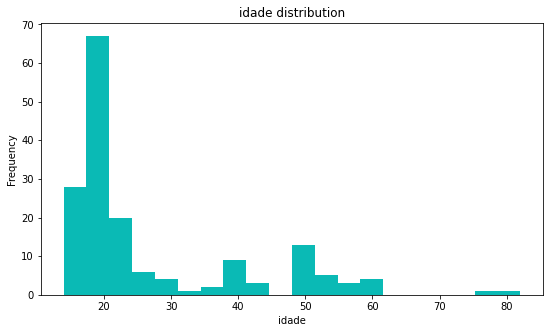

In [163]:
for c in categorias0:
    plot_hist(data,c)

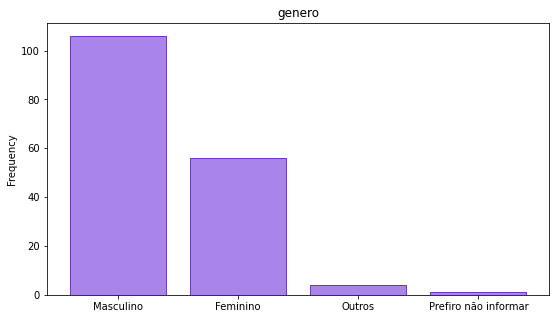

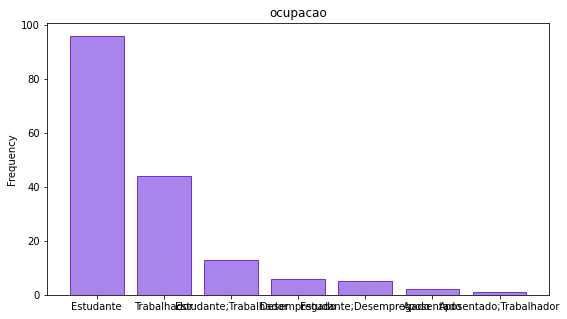

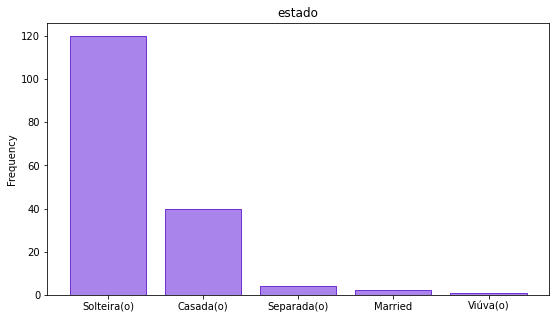

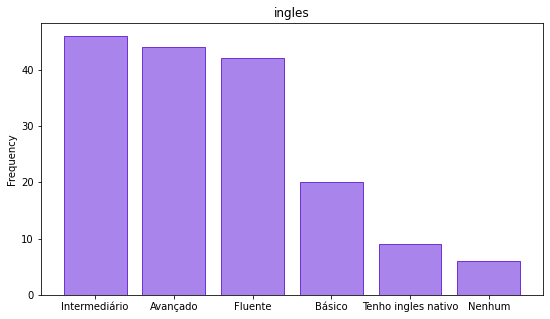

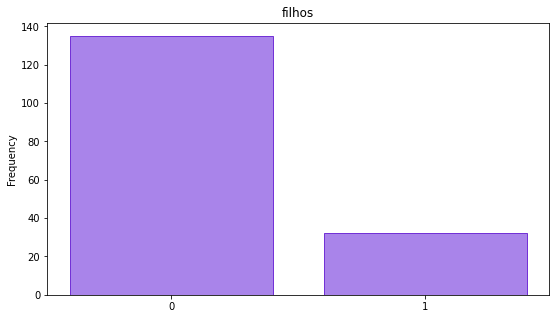

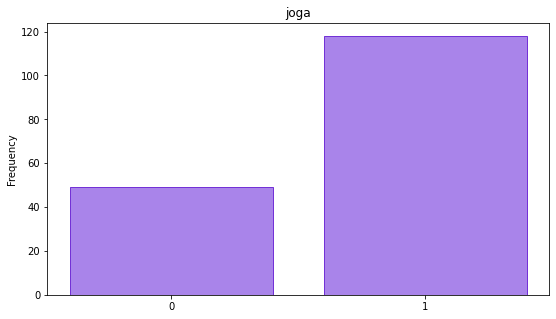

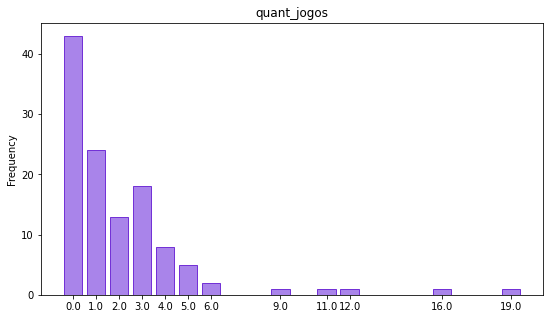

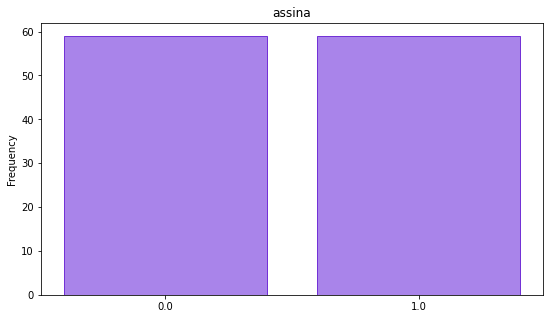

In [164]:
for c in categorias1:
    plot_bar(data,c)

In [165]:
idade=px.bar(data, x='idade',y="count")
joga=px.histogram(data, x="idade", color="joga")
sex=px.pie(data, values='count', names='genero')

In [166]:
joga.show()

In [167]:
data['ocupacao'].value_counts()

Estudante                 96
Trabalhador               44
Estudante;Trabalhador     13
Desempregado               6
Estudante;Desempregado     5
Aposentado                 2
Aposentado;Trabalhador     1
Name: ocupacao, dtype: int64

In [168]:
# comparando Estudante;Desempregado com Estudante;Trabalhador

array = ["Estudante;Desempregado","Estudante;Trabalhador"]

Estudantes=data.loc[data['ocupacao'].isin(array)]

arrayEmprego = ["Estudante","Trabalhador"]

Emprego=data.loc[data['ocupacao'].isin(arrayEmprego)]

arrayAposentado = ["Aposentado;Trabalhador","Aposentado"]

Aposentado=data.loc[data['ocupacao'].isin(arrayAposentado)]


In [169]:
data.head(3)

,idade,genero,ocupacao,estado,ingles,filhos,joga,quant_jogos,fav_jogos,midia,importante_jogo,assina,quais,paga,count
0,20,Feminino,Estudante,Solteira(o),Fluente,0,1,0.0,Ação/Aventura,Mídia digital,Indiferente,0.0,NaN,Não pagaria,1.0
1,20,Masculino,Estudante,Solteira(o),Fluente,0,1,1.0,Ação/Aventura;Estratégia;RPG;Simulação,Mídia física,Desconto;Duração;Preço;Qualidade,0.0,NaN,10 a 30,1.0
2,20,Feminino,Estudante,Solteira(o),Intermediário,0,1,1.0,Ação/Aventura;FPS;Simulação,Indiferente,Duração;Preço;Qualidade,0.0,NaN,10 a 30,1.0


In [170]:
for c in categorias1:

    print(data[c].value_counts(1)) #ver dados bem distribuidos 
    

Masculino               0.634731
Feminino                0.335329
Outros                  0.023952
Prefiro não informar    0.005988
Name: genero, dtype: float64
Estudante                 0.574850
Trabalhador               0.263473
Estudante;Trabalhador     0.077844
Desempregado              0.035928
Estudante;Desempregado    0.029940
Aposentado                0.011976
Aposentado;Trabalhador    0.005988
Name: ocupacao, dtype: float64
Solteira(o)    0.718563
Casada(o)      0.239521
Separada(o)    0.023952
Married        0.011976
Viúva(o)       0.005988
Name: estado, dtype: float64
Intermediário          0.275449
Avançado               0.263473
Fluente                0.251497
Básico                 0.119760
Tenho ingles nativo    0.053892
Nenhum                 0.035928
Name: ingles, dtype: float64
0    0.808383
1    0.191617
Name: filhos, dtype: float64
1    0.706587
0    0.293413
Name: joga, dtype: float64
0.0     0.364407
1.0     0.203390
3.0     0.152542
2.0     0.110169
4.0     0.067

In [171]:
categorias_todas

['idade',
 'genero',
 'ocupacao',
 'estado',
 'ingles',
 'filhos',
 'joga',
 'quant_jogos',
 'fav_jogos',
 'midia',
 'importante_jogo',
 'assina',
 'quais',
 'paga',
 'count']

In [235]:
tempdf=data.groupby(['ingles','joga']).joga.count().unstack().fillna(0)
tempdf['total']=data['ingles'].value_counts()
tempdf['0 em %']=tempdf[0]/tempdf['total']*100
tempdf['1 em %']=tempdf[1]/tempdf['total']*100
tempdf
# quanto maior o seu conhecimento mais provavel de vc jogar

joga,0,1,total,0 em %,1 em %
ingles,,,,,
Avançado,15.0,29.0,44,34.090909,65.909091
Básico,11.0,9.0,20,55.000000,45.000000
Fluente,7.0,35.0,42,16.666667,83.333333
Intermediário,14.0,32.0,46,30.434783,69.565217
Nenhum,2.0,4.0,6,33.333333,66.666667
Tenho ingles nativo,0.0,9.0,9,0.000000,100.000000


In [270]:
tempdf=data['fav_jogos']
test=str(tempdf[1]).split(";")
comparar=[]

for c in test:
    if(not(c in comparar)):
        comparar.append(c)
print(comparar)

['Ação/Aventura', 'Estratégia', 'RPG', 'Simulação']


[Text(0.5, 1.0, 'assinatura')]

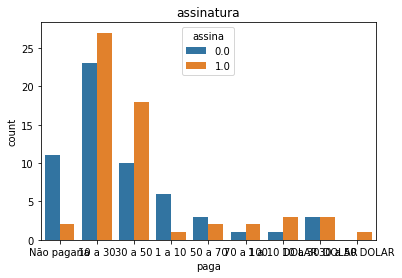

In [173]:
sns.countplot(x='paga', data=data, hue='assina').set(title='assinatura')

[Text(0.5, 1.0, 'ingles_nivel')]

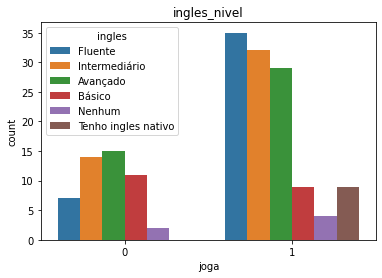

In [174]:

sns.countplot(x='joga', data=data, hue='ingles').set(title='ingles_nivel')


,idade,genero,ocupacao,estado,ingles,filhos,joga,quant_jogos,fav_jogos,midia,importante_jogo,assina,quais,paga,count
0,20,Feminino,Estudante,Solteira(o),Fluente,0,1,0.0,Ação/Aventura,Mídia digital,Indiferente,0.0,NaN,Não pagaria,1.0
1,20,Masculino,Estudante,Solteira(o),Fluente,0,1,1.0,Ação/Aventura;Estratégia;RPG;Simulação,Mídia física,Desconto;Duração;Preço;Qualidade,0.0,NaN,10 a 30,1.0
2,20,Feminino,Estudante,Solteira(o),Intermediário,0,1,1.0,Ação/Aventura;FPS;Simulação,Indiferente,Duração;Preço;Qualidade,0.0,NaN,10 a 30,1.0
3,20,Masculino,Estudante,Solteira(o),Fluente,0,1,3.0,Ação/Aventura;Battle Royale;Corrida;Luta;RPG;S...,Indiferente,Desconto;Preço;Qualidade,1.0,"Game Pass;Prime gaming, epic games (não é pago...",10 a 30,1.0
4,15,Masculino,Estudante,Casada(o),Avançado,1,1,0.0,Estratégia;RPG,Indiferente,Desconto;Preço;Qualidade,1.0,Game Pass,30 a 50,1.0
5,55,Feminino,Desempregado,Casada(o),Intermediário,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6,21,Masculino,Estudante,Solteira(o),Básico,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7,19,Masculino,Estudante,Solteira(o),Intermediário,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8,20,Masculino,Estudante,Solteira(o),Intermediário,0,1,3.0,Estratégia;RPG;Simulação;Roguelike,Mídia digital,Qualidade,0.0,NaN,10 a 30,1.0
9,21,Masculino,Estudante,Solteira(o),Fluente,0,1,0.0,Estratégia;RPG,Mídia digital,Qualidade,0.0,NaN,10 a 30,1.0


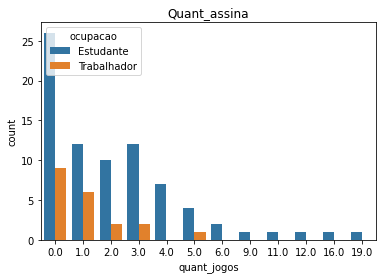

In [176]:

sns.countplot(x='quant_jogos', data=Emprego, hue='ocupacao').set(title='Quant_assina')
#maioria dos consumidores sao estudantes
